In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import sys

In [2]:
df=pd.read_csv("Resources/weather_by_year_month.csv")
kf=pd.read_csv("Resources/crime_month.csv")
lf=pd.read_csv("Resources/animals_bites.csv")
dr= df[["Year/Month","Max Temperature (mean)"]]
dr

,Year/Month,Max Temperature (mean)
0,2013-01,39.235639
1,2013-02,38.266915
2,2013-03,41.918568
3,2013-04,59.849450
4,2013-05,69.487237
5,2013-06,76.663072
6,2013-07,77.079234
7,2013-08,78.142540
8,2013-09,72.793894
9,2013-10,59.824667


In [3]:
df.to_csv("weather_by_year_month.csv")

In [4]:
kf.to_csv("crime_month.csv")

In [5]:
lf.to_csv("animals_bites.csv")

In [6]:
lf=lf.rename(columns={"Year data":"num_bites"})

In [7]:
kf=kf.rename(columns={"Date Occurred":"num_crime"})

In [8]:
merge_df= pd.merge(kf, lf)
merge_df

,Unnamed: 0,Unnamed: 0.1,Year/Month,num_crime,rate_crime,num_bites,bites rate
0,0,0,2013-01,6198,0.015606,67,0.013
1,1,1,2013-02,5251,0.013221,75,0.015
2,2,2,2013-03,5866,0.014770,78,0.015
3,3,3,2013-04,6330,0.015938,110,0.021
4,4,4,2013-05,6835,0.017209,139,0.027
5,5,5,2013-06,6839,0.017220,123,0.024
6,6,6,2013-07,6938,0.017469,103,0.020
7,7,7,2013-08,7211,0.018156,108,0.021
8,8,8,2013-09,6663,0.016776,96,0.019
9,9,9,2013-10,6820,0.017172,74,0.014


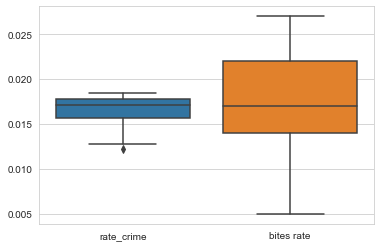

In [9]:
sns.set_style("whitegrid")
data = merge_df[["rate_crime","bites rate"]]
sns.boxplot(data=data)

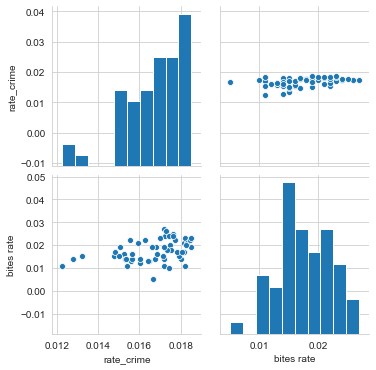

In [10]:
sns.pairplot(merge_df[['rate_crime','bites rate']])
plt.show()

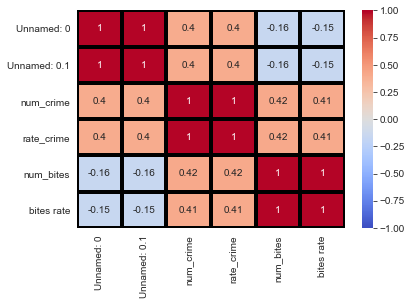

In [37]:
sns.heatmap(merge_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')


The r-squared is: 0.44


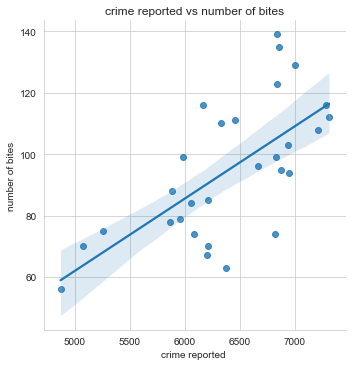

In [32]:
data=merge_df.head(29)
x_values = merge_df['num_crime'].head(29)
y_values = merge_df['num_bites'].head(29)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
sns.set_style("whitegrid")
sns.lmplot(x='num_crime',y='num_bites',data=data)
plt.xlabel('crime reported ')
plt.ylabel('number of bites')
regress_values = x_values * slope + intercept
plt.title('crime reported vs number of bites')
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.show()

In [12]:
# we  have r=.44 that reflects a weak correlation coefficient due to the fact that not all the crime are relating to the the number of bites and not all bites are caused by crime 
#in the beginning of our statistical evaluation we recorded the following outcomes:
#81.3% dog bites/cats with 17.4%
#55.5%  crimes occurs at  residence/home (highest)
#55.5% crime type: theft/larceny
#those results gaves us a map of where the  correlation takes place
## need to test the significance of our correlation coefficient 
# we need to conduct a test statistic 
#we are using a significance level of 5%,  α=0.05 
#If the  p-value  is less than the significance level ( α=0.05 ):
#Decision: Reject the null hypothesis.
#Conclusion: "There is sufficient evidence to conclude that there is a significant linear relationship 
#between  x  and  y  because the correlation coefficient is significantly different from zero."

sample1 = merge_df['num_crime'].head(29)
sample2 = merge_df['num_bites'].head(29)

stats.ttest_ind(sample1, sample2, equal_var=False)

Ttest_indResult(statistic=53.51539546369314, pvalue=8.395284468668537e-30)

In [13]:
merge_wb= pd.merge(dr,lf)
merge_wb= merge_wb.rename(columns={"Year data":"number_bites"})
merge_wb

,Year/Month,Max Temperature (mean),Unnamed: 0,Unnamed: 0.1,num_bites,bites rate
0,2013-01,39.235639,0,0,67,0.013
1,2013-02,38.266915,1,1,75,0.015
2,2013-03,41.918568,2,2,78,0.015
3,2013-04,59.849450,3,3,110,0.021
4,2013-05,69.487237,4,4,139,0.027
5,2013-06,76.663072,5,5,123,0.024
6,2013-07,77.079234,6,6,103,0.020
7,2013-08,78.142540,7,7,108,0.021
8,2013-09,72.793894,8,8,96,0.019
9,2013-10,59.824667,9,9,74,0.014


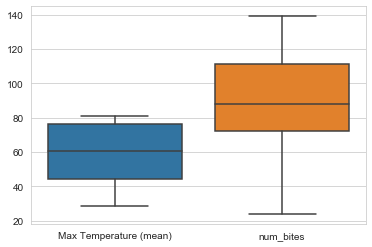

In [14]:
sns.set_style("whitegrid")
data = merge_wb[["Max Temperature (mean)","num_bites"]]
sns.boxplot(data=data)

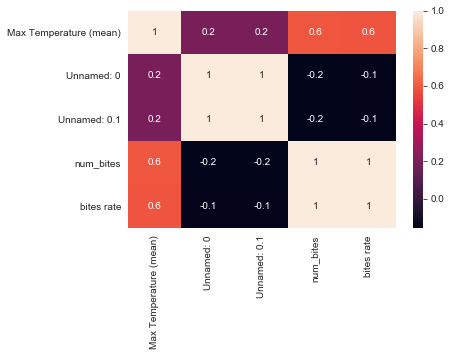

In [36]:
sns.heatmap(merge_wb.corr(), annot = True, fmt='.1g')

The r-squared is: 0.65


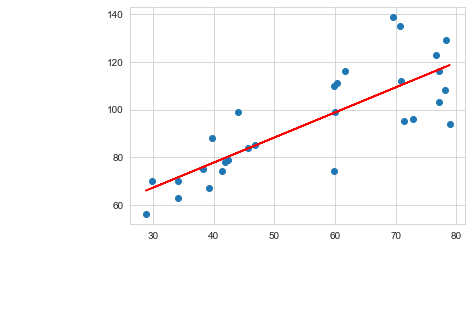

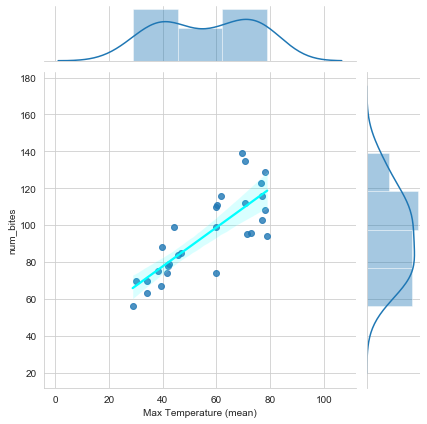

In [22]:
data=merge_wb.head(29)
x_values = merge_wb['Max Temperature (mean)'].head(29)
y_values = merge_wb['num_bites'].head(29)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()
g = sns.jointplot(x="Max Temperature (mean)", y="num_bites", data=data, kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}})

In [19]:
sample1 = merge_wb['Max Temperature (mean)'].head(29)
sample2 = merge_wb['num_bites'].head(29)

stats.ttest_ind(sample1, sample2, equal_var=False)

Ttest_indResult(statistic=-7.361326569516419, pvalue=1.2598516150344579e-09)

In [ ]:
#we are using a significance level of 5%,  α=0.05 
#If the  p-value  is less than the significance level ( α=0.05 ):
#Decision: Reject the null hypothesis.
#Conclusion: "There is sufficient evidence to conclude that there is a significant linear relationship 
#between  x  and  y  because the correlation coefficient is significantly different from zero."

